In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

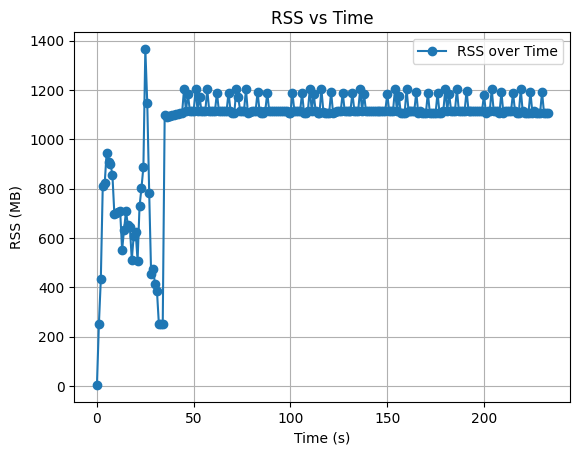

In [ ]:
TIMESERIES_FILE = './527_cam4_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


In [3]:
df = pd.read_csv('./527_cam4_r_out.csv')
default_rss = 1228.67969

In [4]:
df.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
0,False,False,47975,secondary,12,7,6,14,3,37,...,True,True,16274,247588,27,339,9,default,True,1234.91797
1,True,True,22347,primary,15,14,13,28,10,79,...,False,False,1795,90091,46,108,54,never,False,1238.90625
2,True,False,31159,primary,21,10,4,20,14,46,...,False,True,10418,56292,9,303,37,always,True,1334.75000
3,False,True,4737,disabled,1,2,11,8,7,10,...,True,False,4131,159917,68,214,62,always,False,1403.04297
4,False,False,14689,disabled,5,8,2,17,16,70,...,False,True,13942,229927,14,184,79,never,True,1269.58203


In [5]:
df.nsmallest(10, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
42,False,False,22228,primary,10,11,14,2,5,11,...,False,True,1190,139449,45,248,73,default,True,1211.81250
32,False,False,23717,disabled,10,10,9,2,5,15,...,False,True,1190,139449,45,263,73,default,False,1212.30859
37,False,False,23717,secondary,10,10,12,1,6,15,...,False,False,178,139449,45,215,73,default,True,1212.71094
34,False,False,23717,primary,10,11,12,5,5,15,...,True,True,1190,139449,45,204,73,default,False,1213.29688
47,False,False,23717,primary,7,16,14,1,9,15,...,False,False,1190,153189,54,263,73,never,False,1213.82812
35,False,False,23717,disabled,10,10,9,3,7,15,...,False,True,1190,139449,45,263,77,never,True,1214.08203
44,False,False,22228,secondary,12,8,14,2,6,6,...,False,True,475,139449,45,248,71,default,True,1214.64453
24,False,False,23717,disabled,23,16,9,11,10,15,...,True,True,1190,153189,54,263,73,default,False,1216.46875
30,False,False,16248,primary,10,7,12,14,16,33,...,True,False,7539,228147,45,329,72,default,False,1216.46875
43,False,False,15561,primary,13,11,16,2,5,4,...,True,True,1190,139449,45,248,73,default,True,1216.78125


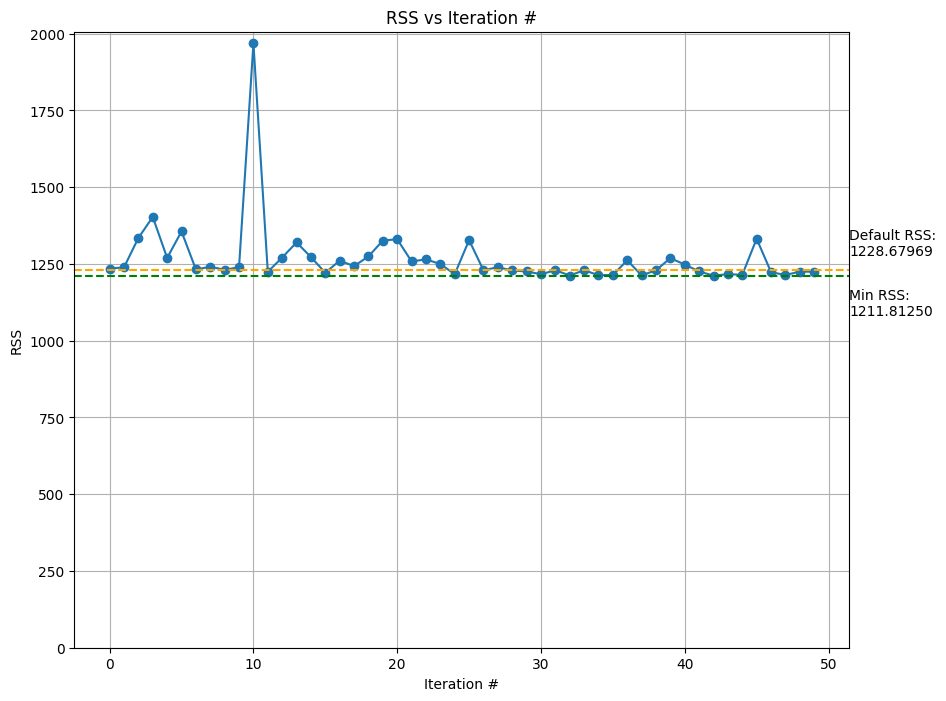

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [10]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(1.3727898440316806)